<a href="https://colab.research.google.com/github/sanjulikasharma/Machine-Learning-Algorithms-/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression Implementation using Sklearn



In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Convert to pandas DataFrame for better visualization (optional)
data = pd.DataFrame(np.hstack([X, y]), columns=['X', 'y'])
print(data.head())

          X         y
0  0.749080  6.334288
1  1.901429  9.405278
2  1.463988  8.483724
3  1.197317  5.604382
4  0.312037  4.716440


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Create a Linear Regression object
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

LinearRegression()

In [6]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [7]:
# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")

# Print the coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_}")

Mean Squared Error: 0.6536995137170021
R^2 Score: 0.8072059636181392
Intercept: [4.14291332]
Coefficient: [[2.79932366]]


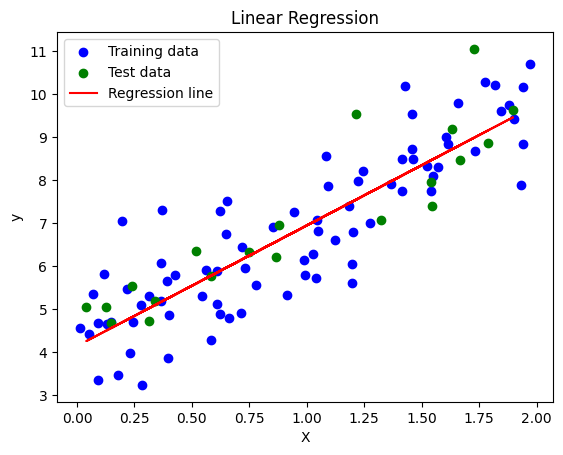

In [8]:
# Plot the training data
plt.scatter(X_train, y_train, color='blue', label='Training data')

# Plot the test data
plt.scatter(X_test, y_test, color='green', label='Test data')

# Plot the regression line
plt.plot(X_test, y_pred, color='red', label='Regression line')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()

# Linear Regression Implementation from Scratch


In [9]:
import numpy as np
import matplotlib.pyplot as plt

We will be using the same dataset, we used above


In [10]:
print(data.head())

          X         y
0  0.749080  6.334288
1  1.901429  9.405278
2  1.463988  8.483724
3  1.197317  5.604382
4  0.312037  4.716440


In [11]:
# Adding Bias Term (intercept) to X
X_b = np.c_[np.ones((100, 1)), X]

In [12]:
# Hyperparameters
learning_rate = 0.1
n_iterations = 1000

In [13]:
# Initialize parameters (weights and bias)
theta = np.random.randn(2, 1)  # Random initialization

*   We will be using Gradient Descent to minimize the cost function
*   Here, learning rate controls the step size  during parameter updates. If it's too large, the algorithm may not converge; if it's too small, convergence will be slow.

*   Cost function measures how well the model is performing. In this case, we use mean squared error

In [14]:
# Gradient Descent
for iteration in range(n_iterations):
    # Compute predictions
    y_pred = X_b.dot(theta)

    # Compute the error (difference between predictions and actual values)
    error = y_pred - y

    # Compute gradients (partial derivatives of the cost function)
    gradients = (2 / len(X_b)) * X_b.T.dot(error)

    # Update parameters
    theta -= learning_rate * gradients

    # Print the cost every 100 iterations
    if iteration % 100 == 0:
        cost = np.mean(error**2)
        print(f"Iteration {iteration}, Cost: {cost}")

# Final parameters
print(f"Final parameters (theta): {theta}")

Iteration 0, Cost: 31.009348571941214
Iteration 100, Cost: 0.8074669076216543
Iteration 200, Cost: 0.8065854475421992
Iteration 300, Cost: 0.8065845648518619
Iteration 400, Cost: 0.8065845639679394
Iteration 500, Cost: 0.806584563967054
Iteration 600, Cost: 0.8065845639670531
Iteration 700, Cost: 0.8065845639670535
Iteration 800, Cost: 0.8065845639670534
Iteration 900, Cost: 0.8065845639670534
Final parameters (theta): [[4.21509616]
 [2.77011339]]


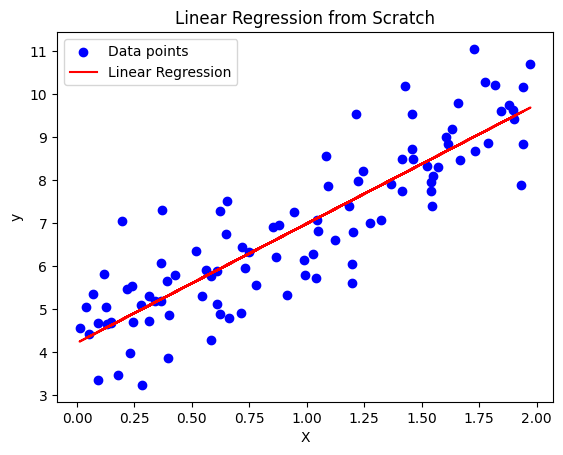

In [15]:
# Plot the results
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, X_b.dot(theta), color='red', label='Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression from Scratch')
plt.legend()
plt.show()
